# Online Retail K-Means & Hierarchical Clustering
## Problem Definition
**We will be using the online retail trasnational dataset to build a RFM clustering and choose the best set of customers 
which the company should target.**
## Data
**Got this Data from kaggle:**
https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

In [63]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df=pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],
                                format='%d-%m-%Y %H:%M')

In [5]:
max_date=df['InvoiceDate'].max()

In [6]:
df['diff']=max_date-df['InvoiceDate']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    541909 non-null  object         
 1   StockCode    541909 non-null  object         
 2   Description  540455 non-null  object         
 3   Quantity     541909 non-null  int64          
 4   InvoiceDate  541909 non-null  datetime64[ns] 
 5   UnitPrice    541909 non-null  float64        
 6   CustomerID   406829 non-null  float64        
 7   Country      541909 non-null  object         
 8   diff         541909 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), timedelta64[ns](1)
memory usage: 37.2+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,diff
count,541909.000000,541909.000000,406829.000000,541909
mean,9.552250,4.611114,15287.690570,157 days 23:15:02.843613964
std,218.081158,96.759853,1713.600303,115 days 21:05:07.004935280
min,-80995.000000,-11062.060000,12346.000000,0 days 00:00:00
25%,1.000000,1.250000,13953.000000,51 days 01:23:00
50%,3.000000,2.080000,15152.000000,142 days 19:33:00
75%,10.000000,4.130000,16791.000000,256 days 01:16:00
max,80995.000000,38970.000000,18287.000000,373 days 04:24:00


In [25]:
df=df[(df['UnitPrice']>0) & (df['Quantity']>0)]

In [64]:
df['amount']=df['UnitPrice']*df['Quantity']

In [31]:
df['CustomerID'].dtype

dtype('float64')

In [34]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
diff                0
amount              0
dtype: int64

In [35]:
df=df.dropna()

In [36]:
df['CustomerID']=df['CustomerID'].astype(int)

In [37]:
total_purchase=df.groupby('CustomerID')['amount'].sum()
total_purchase=total_purchase.reset_index()
total_purchase.head()

,CustomerID,amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [38]:
recency=df.groupby('CustomerID')['diff'].min()
recency=recency.reset_index()
recency.head()

,CustomerID,diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [39]:
df['CustomerID'].dtype

dtype('int32')

In [40]:
freq=df.groupby('CustomerID')['InvoiceNo'].count()
freq=freq.reset_index()
freq.head()

,CustomerID,InvoiceNo
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [41]:
freq_diff=pd.merge(recency,freq,how='inner')

In [42]:
freq_diff.head()

,CustomerID,diff,InvoiceNo
0,12346,325,1
1,12347,1,182
2,12348,74,31
3,12349,18,73
4,12350,309,17


In [44]:
final=pd.merge(total_purchase,freq_diff,how='inner')
final.columns = ['CustomerID', 'T.Purchase', 'Recency','Frequency']
final.head()

,CustomerID,T.Purchase,Recency,Frequency
0,12346,77183.60,325,1
1,12347,4310.00,1,182
2,12348,1797.24,74,31
3,12349,1757.55,18,73
4,12350,334.40,309,17


In [46]:
final.isna().sum()

CustomerID    0
T.Purchase    0
Recency       0
Frequency     0
dtype: int64

In [48]:
final.shape

(4338, 4)

In [49]:
df.shape

(397884, 10)

In [50]:
Ml_df=final.drop('CustomerID',axis=1)

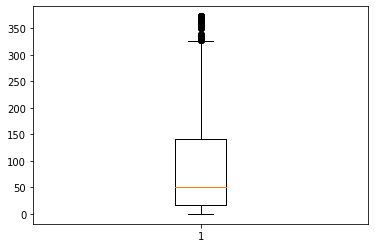

In [57]:
plt.boxplot(Ml_df['Recency']);

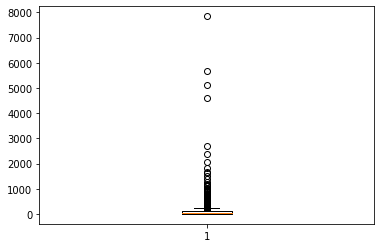

In [58]:
plt.boxplot(Ml_df['Frequency']);

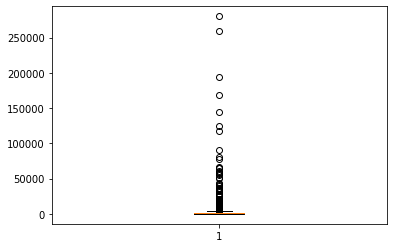

In [59]:
plt.boxplot(Ml_df['T.Purchase']);

In [60]:
#remove outliers

In [70]:
def outlier(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            print(col)
            print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
            print(lower ,">",col,"<",upper)
            plt.figure(figsize=(15,5))
            sns.boxplot(df[col],palette="Set2")
            plt.show()
            df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df

T.Purchase
Q1 =  307.41499999999996  Q3 =  1661.7400000000002  IQR =  1354.3250000000003
-1724.0725000000004 > T.Purchase < 3693.227500000001


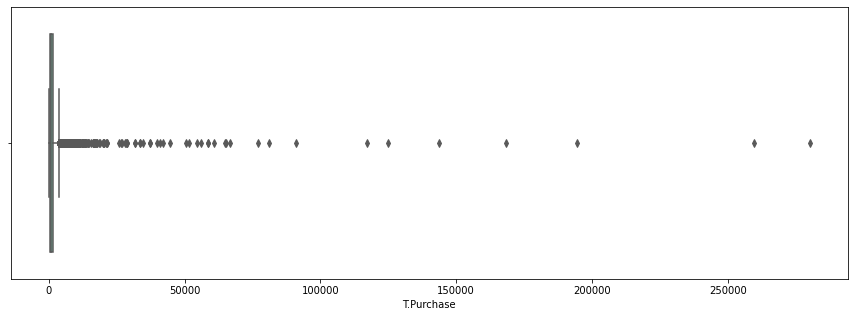

Recency
Q1 =  21.0  Q3 =  157.0  IQR =  136.0
-183.0 > Recency < 361.0


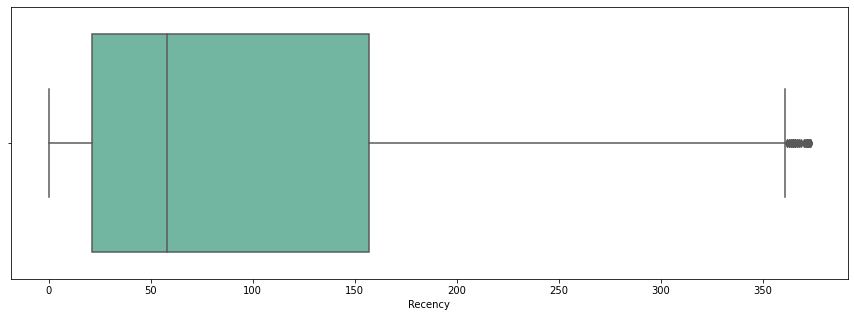

Frequency
Q1 =  16.0  Q3 =  81.0  IQR =  65.0
-81.5 > Frequency < 178.5


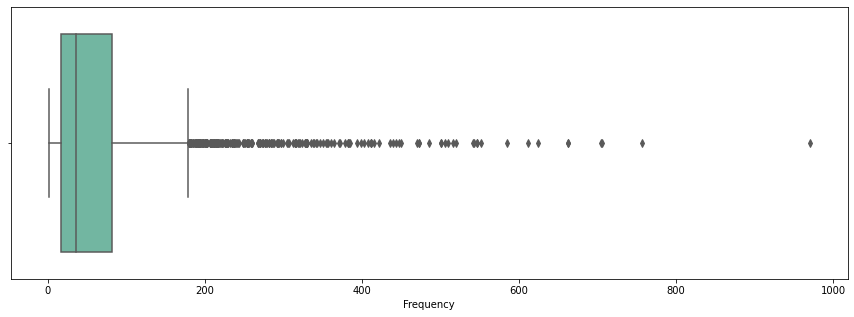

In [88]:
dff=outlier(Ml_df)

T.Purchase
Q1 =  272.1075  Q3 =  1101.7025  IQR =  829.595
-972.2849999999999 > T.Purchase < 2346.0950000000003


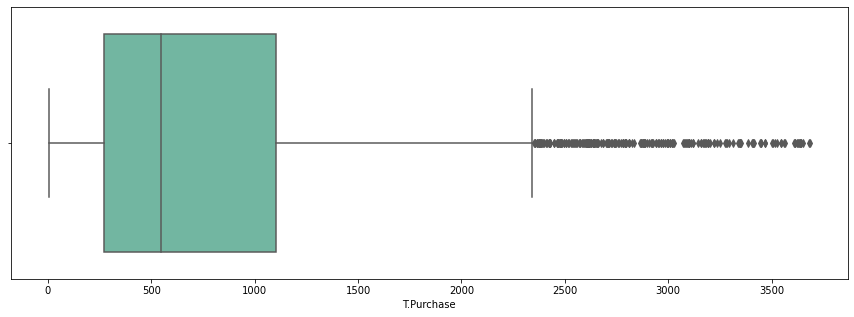

Recency
Q1 =  23.0  Q3 =  168.0  IQR =  145.0
-194.5 > Recency < 385.5


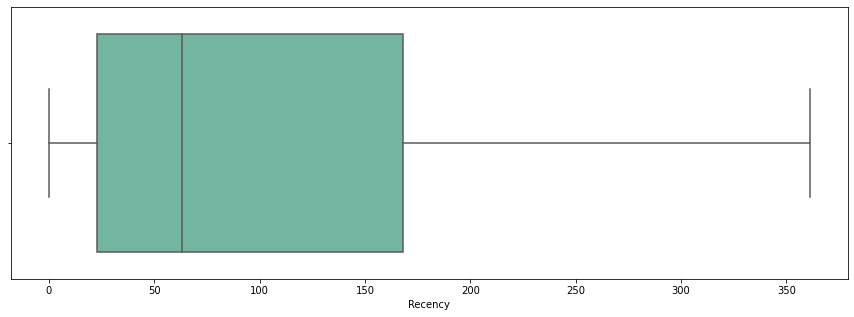

Frequency
Q1 =  14.0  Q3 =  60.0  IQR =  46.0
-55.0 > Frequency < 129.0


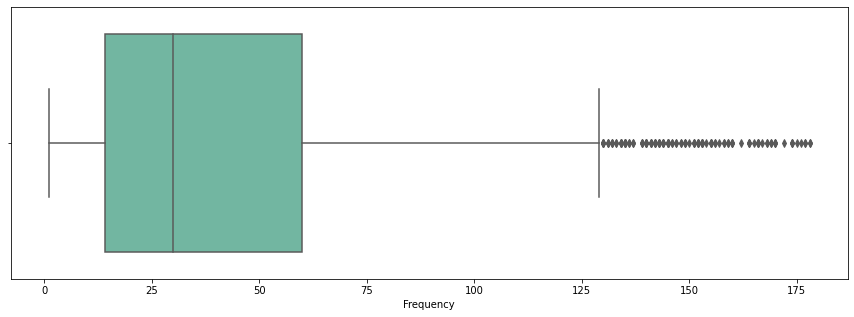

In [89]:
dff=outlier(dff)

In [90]:
dff.shape

(3239, 3)

In [98]:
from sklearn.preprocessing import MinMaxScaler
# instantiate
scaler = MinMaxScaler()

# fit_transform
dff_scaled = scaler.fit_transform(dff)
dff_scaled.shape

(3239, 3)

In [99]:
scaled_df=pd.DataFrame(dff_scaled,columns=dff.columns)

In [100]:
scaled_df.head()

,T.Purchase,Recency,Frequency
0,0.767403,0.204986,0.234375
1,0.750420,0.049861,0.562500
2,0.141479,0.855956,0.125000
3,0.036477,0.562327,0.023438
4,0.460252,0.639889,0.445312


# Modelling
* Model 1 : Kmeans Clustering
* Model 2 : Hierarchial Clustering
* Model 3 : DBSCAN Clustering

Text(0, 0.5, 'SSE')

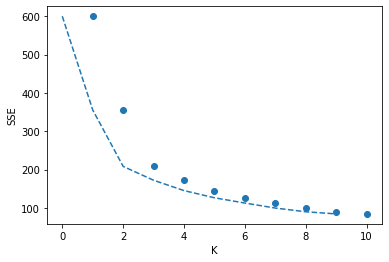

In [103]:
# Model 1
from sklearn.cluster import KMeans
sse=[]
# Getting right numbers of K 
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(sse,'--')
plt.scatter(x,sse)
plt.xlabel('K')
plt.ylabel('SSE')

So my elbow rule we can take K=2

In [106]:
model1=KMeans(n_clusters=2,random_state=42)
model1.fit(scaled_df);

In [107]:
model1.labels_

array([0, 0, 1, ..., 1, 1, 0])

In [108]:
df_results=scaled_df.copy()
df_results['k_cluster']=model1.labels_

In [110]:
df_results['k_cluster'].value_counts()

1    2086
0    1153
Name: k_cluster, dtype: int64

In [111]:
df_results.head()

,T.Purchase,Recency,Frequency,k_cluster
0,0.767403,0.204986,0.234375,0
1,0.750420,0.049861,0.562500,0
2,0.141479,0.855956,0.125000,1
3,0.036477,0.562327,0.023438,1
4,0.460252,0.639889,0.445312,1


In [115]:
model1.cluster_centers_

array([[0.49979938, 0.1250063 , 0.5407197 ],
       [0.15755712, 0.37412072, 0.15371206]])

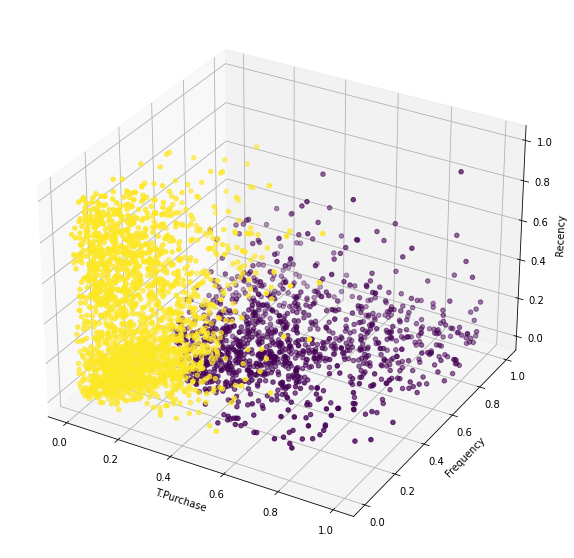

In [126]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_results['T.Purchase'],df_results['Frequency'],df_results['Recency'],c=df_results['k_cluster'], cmap='viridis')
ax.set_xlabel('T.Purchase')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency');

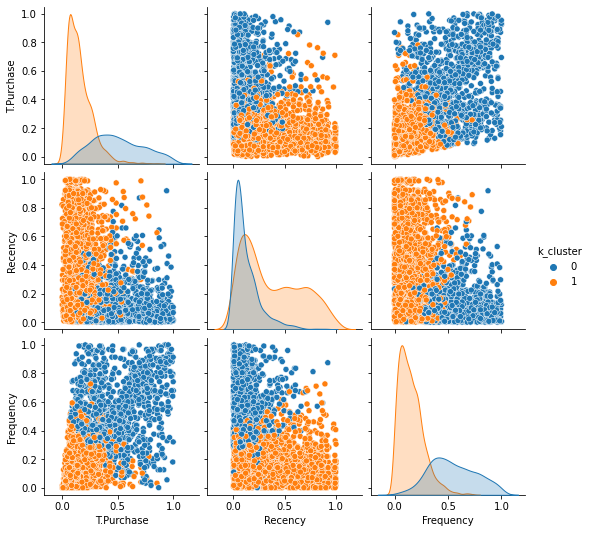

In [133]:
sns.pairplot(df_results,hue='k_cluster')

In [134]:
!pip install spicy

In [138]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

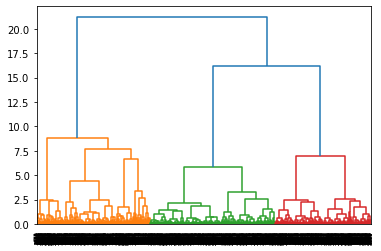

In [137]:
model2 =linkage(scaled_df, 
            method='ward', 
            metric="euclidean")
dendrogram(Z=model2)
plt.show()

In [139]:
cluster_labels = cut_tree(model2, n_clusters=3).reshape(-1, )

array([0, 0, 1, ..., 1, 2, 0])

In [140]:
df_results['h_cluster']=cluster_labels

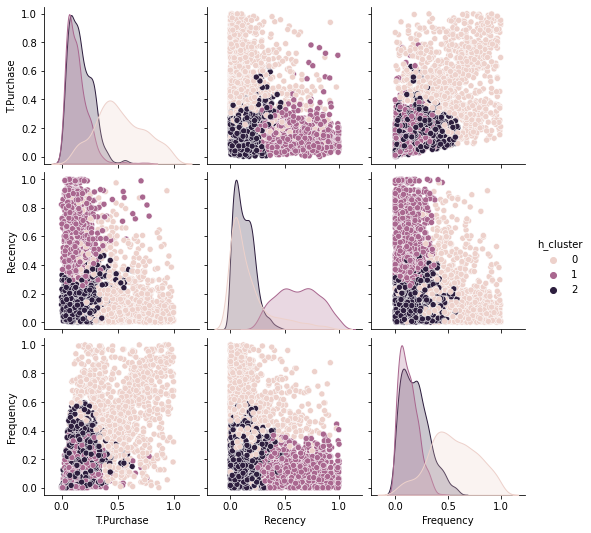

In [144]:
sns.pairplot(df_results.drop('k_cluster',axis=1),hue='h_cluster');

In [153]:
#model3
from sklearn.cluster import DBSCAN
# create an object
model3 = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')

# fit the model
model3.fit(scaled_df);

In [154]:
df_results['db_cluster']=model3.labels_

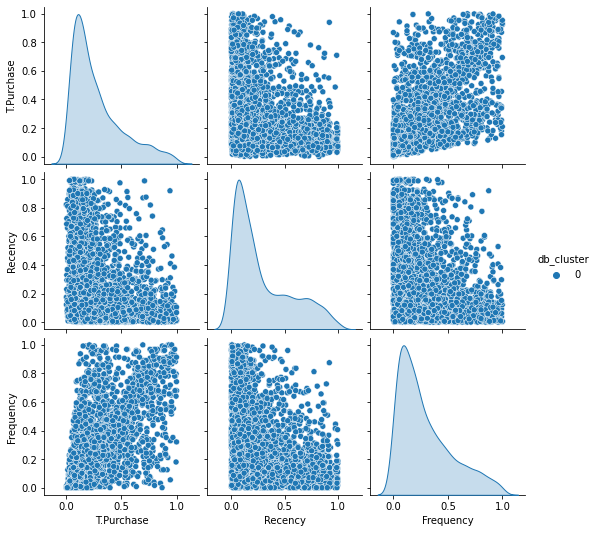

In [155]:
sns.pairplot(df_results.drop(['k_cluster','h_cluster'],axis=1),hue='db_cluster');